# Capstone: Accessing Multidimensional Poverty Idex (MPI)

## Table of Contents

- [About MPI](#about_mpi)
- [Beginning EDA](#begin_eda)
- [Starting Linear Regression Model](#starting_linear_regression_model)

### Synopsis

This capstone will take MPI and answer the following questions:
- Which regions in the world have the highest poverty rate according to MPI?
- Which regions in the world have the highest intensity of depravation according to MPI?
- Is there a correlation between a region and their MPI?


#### DataSets

The capstone will use the Data from:
- Kaggle: https://www.kaggle.com/datasets/ophi/mpi?select=MPI_national.csv

#### Data Description
- ISO: Unique ID for country
- Country: country name
- Sub-national region: Region within country
- World region: General global region
- MPI National: Overall aggregate national MPI score
- MPI Regional: Multi-dimensional poverty index for this region
- Headcount Ratio Regional: Poverty headcount ratio (% of population listed as poor) this region
- Intensity of deprivation Regional: Average distance below the poverty line of those listed as poor in this region


<a id="about_mpi"></a>
### About MPI
MPI is an international measure of acute multidimentisonal poverty currently covering over 100 developing countires. It complements traditional monetary poverty measures by capturing other data such as health, education and living standards that a person faces simultaneously. (Oxford Poverty and Human Development Initiative, https://ophi.org.uk/multidimensional-poverty-index/)

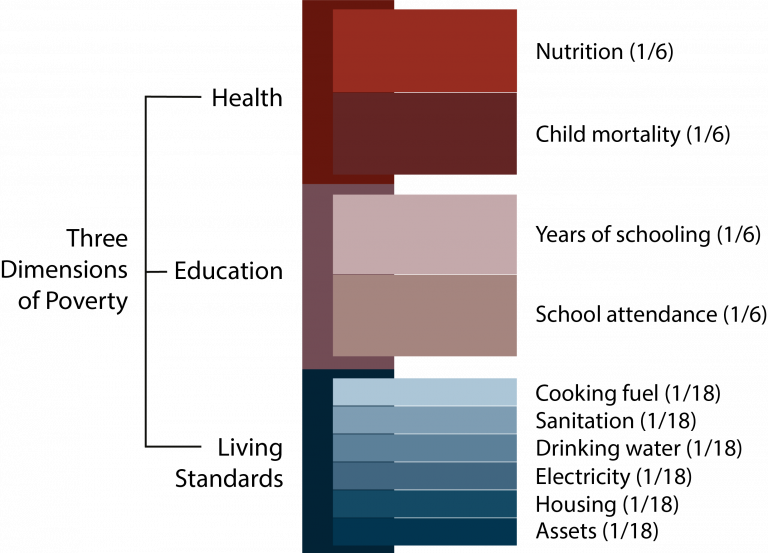
Source: OPHI (2018). Global Multidimensional Poverty Index 2018: The Most Detailed Picture to Date of the World’s Poorest People. Report. Oxford Poverty and Human Development Initiative, University of Oxford.

<a id="begin_eda"></a>
## Beginning EDA

#### Loding & Imports

In [1]:
#Imports for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model & metric imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
sns.set(font_scale=1);

mpi_df = pd.read_csv('mpi_data/mpi_subnational.csv')

#### Checking number of rows and columns

In [2]:
mpi_df.head()

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67.5,57.3
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79.3,58.8
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59.7,50.3
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55.7,54.1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61.0,53.3


In [3]:
#Checking for missing data
mpi_df.isna()

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
979,False,False,False,False,False,False,False,False
980,False,False,False,False,False,False,False,False
981,False,False,False,False,False,False,False,False
982,False,False,False,False,False,False,False,False


In [4]:
mpi_df.isna().sum()

ISO country code                     0
Country                              0
Sub-national region                  0
World region                         0
MPI National                         0
MPI Regional                         0
Headcount Ratio Regional             0
Intensity of deprivation Regional    1
dtype: int64

In [5]:
mpi_df = mpi_df.dropna(how='any', subset=['Intensity of deprivation Regional'], inplace=False)

I was looking for any missing data and at first using the 'isna' didn't produce any missing values, but to be sure I ran the 'isna.sum' which allowed me to see I had some missing values. Becasue I was only missing one value I decided to drop that row of missing data.

In [6]:
mpi_df

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67.5,57.3
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79.3,58.8
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59.7,50.3
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55.7,54.1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61.0,53.3
...,...,...,...,...,...,...,...,...
979,ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.152,0.192,43.7,44.1
980,ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.152,0.174,38.9,44.7
981,ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.152,0.238,53.4,44.5
982,ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.152,0.164,38.2,42.8


In [7]:
mpi_df.shape

(983, 8)

This dataset is 938 rows with 8 columns, which is a small dataset. To make some model predictions, I can foresee creating some dummy variables to help predict things such as 'world regions and their poverty intensity' 

#### Checking data type and more information about dataset

In [8]:
mpi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 983
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ISO country code                   983 non-null    object 
 1   Country                            983 non-null    object 
 2   Sub-national region                983 non-null    object 
 3   World region                       983 non-null    object 
 4   MPI National                       983 non-null    float64
 5   MPI Regional                       983 non-null    float64
 6   Headcount Ratio Regional           983 non-null    float64
 7   Intensity of deprivation Regional  983 non-null    float64
dtypes: float64(4), object(4)
memory usage: 69.1+ KB


The observation I gather from this information is that I'm working with object and float datatypes. I don't have much data to work with, which could be challenging.

In [9]:
#Changing the data type from float to interger to ensure no continous errors will occur when running my models
mpi_df['Intensity of deprivation Regional'] = mpi_df['Intensity of deprivation Regional'].apply(np.int64)
mpi_df['Headcount Ratio Regional'] = mpi_df['Headcount Ratio Regional'].apply(np.int64)

In [10]:
#Ensuring the changes I made are in effect
mpi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 983
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ISO country code                   983 non-null    object 
 1   Country                            983 non-null    object 
 2   Sub-national region                983 non-null    object 
 3   World region                       983 non-null    object 
 4   MPI National                       983 non-null    float64
 5   MPI Regional                       983 non-null    float64
 6   Headcount Ratio Regional           983 non-null    int64  
 7   Intensity of deprivation Regional  983 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 69.1+ KB


In [11]:
mpi_df.describe()

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
count,983.000000,983.000000,983.000000,983.000000
mean,0.204271,0.211545,39.784334,46.722279
std,0.160247,0.183591,29.955845,8.061069
min,0.006000,0.000000,0.000000,33.000000
25%,0.066000,0.053000,12.000000,41.000000
50%,0.174000,0.155000,34.000000,45.000000
75%,0.303000,0.342000,66.000000,51.000000
max,0.605000,0.744000,99.000000,75.000000


#### Sorting MPI Regional in Descending order

In [12]:
mpi_df.sort_values(by=['MPI Regional'], ascending=False)

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
870,TCD,Chad,Lac,Sub-Saharan Africa,0.552,0.744,98,75
882,TCD,Chad,Wadi Fira,Sub-Saharan Africa,0.552,0.709,99,71
58,BFA,Burkina Faso,Est,Sub-Saharan Africa,0.535,0.698,96,72
880,TCD,Chad,Sila,Sub-Saharan Africa,0.552,0.697,98,70
869,TCD,Chad,Kanem,Sub-Saharan Africa,0.552,0.696,98,70
...,...,...,...,...,...,...,...,...
517,MAR,Morocco,Grand Casablanca,Arab States,0.067,0.003,0,39
848,SYR,Syrian Arab Republic,Damascus,Arab States,0.016,0.003,0,34
860,SYR,Syrian Arab Republic,As-swidaa,Arab States,0.016,0.002,0,35
936,UZB,Uzbekistan,Tashkent,Europe and Central Asia,0.008,0.001,0,33


#### Creating histogram to see the range of MPI index for world regions

array([[<AxesSubplot:title={'center':'MPI Regional'}>]], dtype=object)

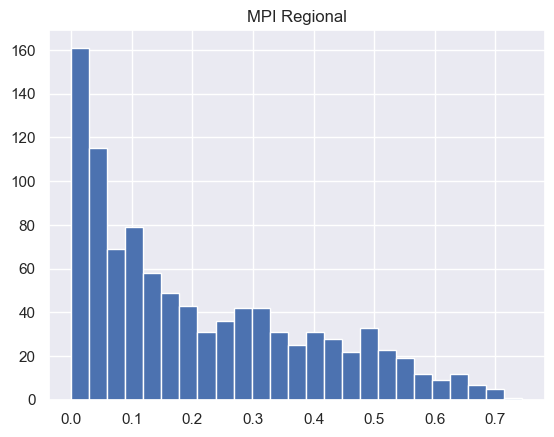

In [13]:
mpi_df.hist(column='MPI Regional', bins=25)

Thus far the data is skewed right revealing that poverty indexies greater than 0.4 are in the minority. The question I will seek to understand is which regions have the highest MPI.

In [14]:
# Majority of this data comes from Sub-Saharan Africa
mpi_df['World region'].value_counts()

Sub-Saharan Africa             431
Latin America and Caribbean    217
East Asia and the Pacific      128
Arab States                    115
South Asia                      81
Europe and Central Asia         11
Name: World region, dtype: int64

<AxesSubplot:>

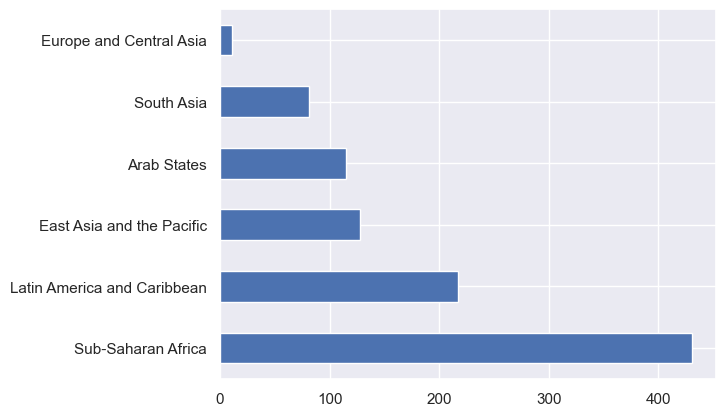

In [15]:
mpi_df['World region'].value_counts().plot(kind='barh')

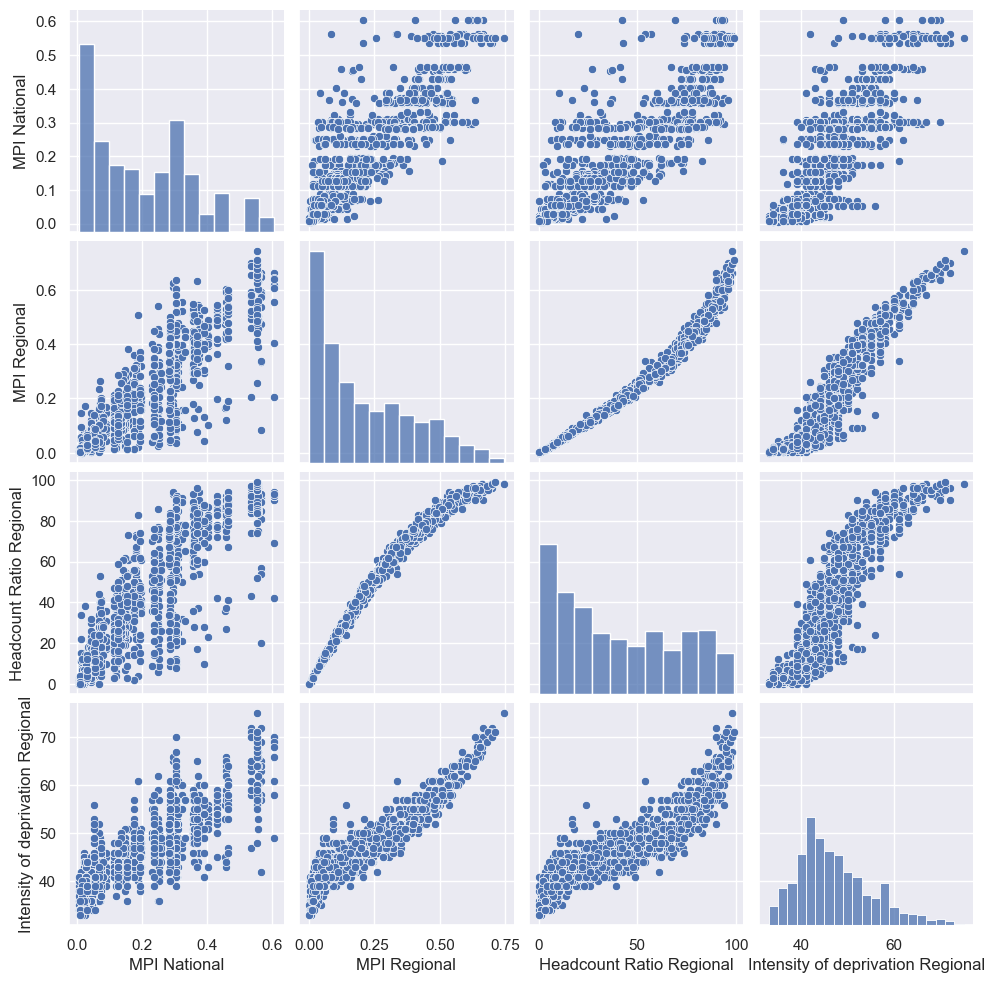

In [16]:
sns.pairplot(mpi_df)

In [17]:
mpi_df.groupby('World region').mean().sort_values('MPI Regional')

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
World region,,,,
Europe and Central Asia,0.028909,0.025273,6.181818,36.727273
Latin America and Caribbean,0.054323,0.063959,13.857143,41.082949
Arab States,0.110783,0.115287,22.669565,42.191304
East Asia and the Pacific,0.124328,0.136266,27.898438,45.109375
South Asia,0.209049,0.219630,43.629630,47.209877
Sub-Saharan Africa,0.332030,0.337128,61.069606,51.412993


In [18]:
mpi_df[['World region','MPI Regional']].groupby(by='World region').max().sort_values(by='MPI Regional', ascending=False)

,MPI Regional
World region,
Sub-Saharan Africa,0.744
South Asia,0.624
East Asia and the Pacific,0.508
Arab States,0.501
Latin America and Caribbean,0.391
Europe and Central Asia,0.086


After doing some EDA, it seems that two regions with the highest MPI according to mean is Sub-Saharan Africa and South Asia. I am not surprised to see Sub-Saharan Africa since that region makes up majority of the data. However I am surprised to see South Asia as the 2nd highest region with a mean MPI of 0.219 (0.22 rounded). This is surprising becasue the this region has the 2nd lowest data points in the entire dataset. 

-------------------------------------------------------------------------------------------------------------------------------

<a id="starting_linear_regression_model"></a>
## Starting Linear Regression Model

For my first model, I want to access the Intensity of deprivation regionally and its relationship Regional MPI

### Linear Regression with one variable

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


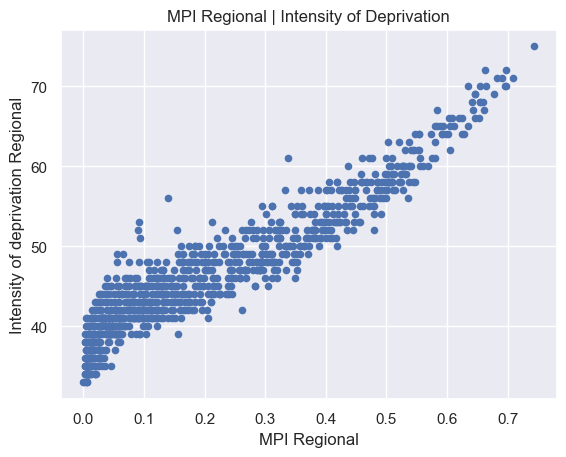

In [19]:
#Scatter plot to see relationship of regional MPI and the intensity of deprivation.
#At first glance I can see a strong relationship between the two
mpi_df.plot(kind='scatter',x='MPI Regional', y='Intensity of deprivation Regional')
plt.title('MPI Regional | Intensity of Deprivation');

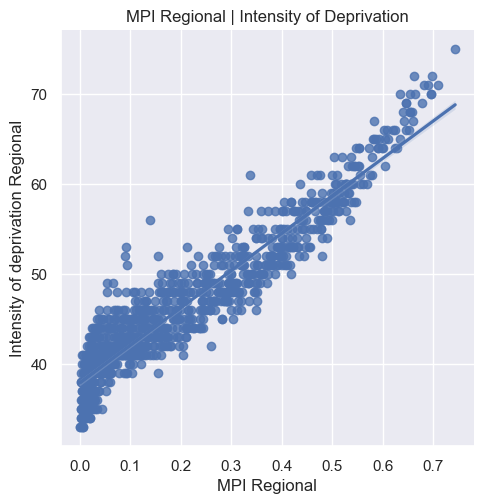

In [20]:
#Plotting the Regional MPI along deprivation intensity in a region with a regression line
sns.lmplot(x='MPI Regional', y='Intensity of deprivation Regional', data=mpi_df);
plt.title('MPI Regional | Intensity of Deprivation');

It seems the higher the MPI Regional then the higher the deprivation will be of that region. The next step will be create a model that can predict the intensity of drepivation based on MPI Regional

In [21]:
feature_cols = ['Intensity of deprivation Regional']
X = mpi_df[feature_cols]
y = mpi_df['MPI Regional']

#Instantiate
linreg = LinearRegression()

#Fit
linreg.fit(X,y)

LinearRegression()

In [22]:
#Making the model predict the Regional if the intensity of deprivation was 0
linreg.predict( np.array([0]).reshape(1,-1) )

C:\Users\rjm37\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.79359031])

In [23]:
#Asking the model to make three more predictions, where the intenisty od deprivation is 40,50 and 70
X_new = [[0],[40],[50], [70]]
linreg.predict(X_new)

C:\Users\rjm37\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.79359031,  0.066929  ,  0.28205883,  0.71231849])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Before splitting
print(f'Features before and after splitting:')
print(f'Before split: {X.shape}')

# After splitting
print(f'Train split: {X_train.shape}')
print(f'Test split: {X_test.shape}')

Features before and after splitting:
Before split: (983, 1)
Train split: (737, 1)
Test split: (246, 1)


In [25]:
# Display the first 5 rows of X_train
X_train.head()

,Intensity of deprivation Regional
768,46
866,64
330,41
338,42
775,47


In [26]:
# Instantiate & Fit
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict
y_pred = linreg.predict(X_test)

# Training and Testing MSE
mse_train = mean_squared_error(y_train, linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print(f' Training MSE: {mse_train}')
print(f' Testing MSE:  {mse_test}')

# Training and TestingRMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print()
print(f' Training RMSE: {rmse_train}')
print(f' Testing RMSE:  {rmse_test}')

 Training MSE: 0.003553242341767292
 Testing MSE:  0.003863438659579145

 Training RMSE: 0.05960907935681688
 Testing RMSE:  0.06215656569968409


In [27]:
# Make predictions for all values of X and add back to the original DataFrame.
y_pred = linreg.predict(X)

# add a new column of y_pred to see the predections
mpi_df['mpi_pred'] = y_pred
mpi_df
#At first glance the y predections are not far off

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional,mpi_pred
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67,57,0.435193
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79,58,0.456902
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59,50,0.283235
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55,54,0.370068
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61,53,0.348360
...,...,...,...,...,...,...,...,...,...
979,ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.152,0.192,43,44,0.152984
980,ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.152,0.174,38,44,0.152984
981,ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.152,0.238,53,44,0.152984
982,ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.152,0.164,38,42,0.109567


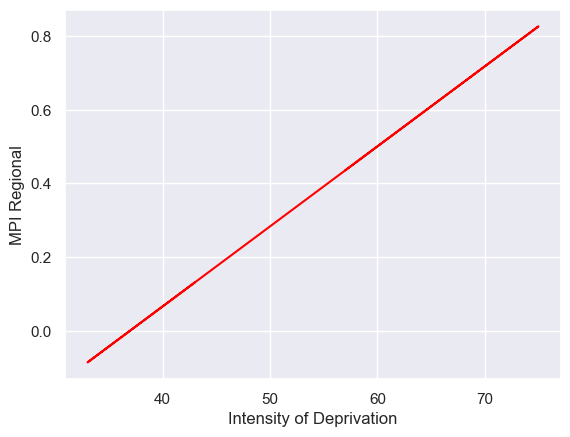

In [28]:
# Plotting those predictions
x_data = mpi_df['Intensity of deprivation Regional']
y_data = y_pred
plt.plot(x_data, y_data, color='red')
plt.xlabel('Intensity of Deprivation');
plt.ylabel('MPI Regional');

Text(0, 0.5, 'MPI Regional')

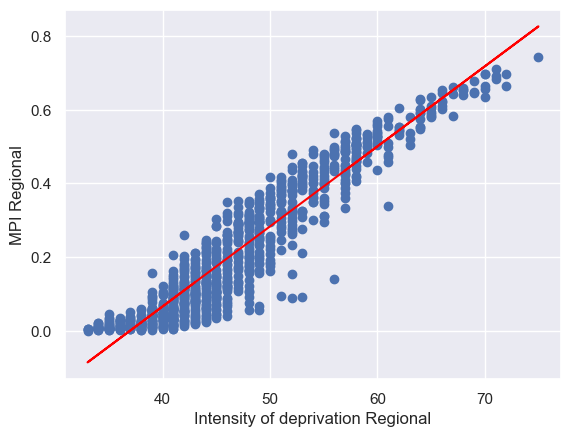

In [71]:
#Plotting the predictions along with the scatter plo
plt.scatter(mpi_df['Intensity of deprivation Regional'], mpi_df['MPI Regional'])
plt.plot(x_data, y_data, color='red')
plt.xlabel('Intensity of Deprivation')
plt.ylabel('MPI Regional')

Based on my observation of the graph, there remains a strong linear correlation to the intensity of regional deprivation and a regions MPI.

## Linear Regression Model 1 Synopsis

Using the lone variable (Intensity of deprevation) to predict a regions MPI the testing mean squared error and root mean squared error are realitively low, which is good. This indicates that the model is working well.

Furthermore, as the model was making predictions based on the training data, it was able to predict regional MPI based on intensity levels that were not in the training data. For example, if the intensity of deprevation is 0 then the MPI Regional would be a negative -0.8, which means there would be no poverty in that region. Also, for an intensity of 70 the regiona MPI would be .7, which indicates extreme deprevation.


However, this is a model based on one variable. For the next model, I will add the regional headout ratio to see if the model is more accurate.

I want to see these predictions across my dataset just to compare to the predictions above

------------------------------------------------------------------------------------------------------------------------------

### Linear regression with two variables

In [30]:
#Loading my dataset
mpi_df

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional,mpi_pred
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67,57,0.435193
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79,58,0.456902
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59,50,0.283235
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55,54,0.370068
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61,53,0.348360
...,...,...,...,...,...,...,...,...,...
979,ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.152,0.192,43,44,0.152984
980,ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.152,0.174,38,44,0.152984
981,ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.152,0.238,53,44,0.152984
982,ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.152,0.164,38,42,0.109567


In [31]:
#Adding headcout to the feature columns
feature_cols = ['Intensity of deprivation Regional', 'Headcount Ratio Regional']
X = mpi_df[feature_cols]
y = mpi_df['MPI Regional']

#Instantiate & Fit
lr = LinearRegression()
lr.fit(X,y)
lr.predict(X)[:10] #looking at the first 10 predictions

array([0.40097223, 0.46008892, 0.31779415, 0.32803439, 0.34722688,
       0.33007606, 0.34031631, 0.27428905, 0.2724986 , 0.38996237])

From the first 10 values in the array, it already seems like the model has made tigher predictions with multiple variables as opposed to one

In [32]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Before splitting
print(f'Features before and after splitting:')
print(f'Before split: {X.shape}')

# After splitting
print(f'Train split: {X_train.shape}')
print(f'Test split: {X_test.shape}')

Features before and after splitting:
Before split: (983, 2)
Train split: (737, 2)
Test split: (246, 2)


In [33]:
#Checking my first 5 rows of X_train
X_train.head()

,Intensity of deprivation Regional,Headcount Ratio Regional
615,36,9
548,58,75
753,44,7
48,46,51
598,44,54


In [34]:
# Displaying the first 5 rows of y_train
y_train.head()

615    0.034
548    0.440
753    0.035
48     0.238
598    0.245
Name: MPI Regional, dtype: float64

In [35]:
# Instantiate and fit
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Training and testing MSE
mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print(f' Training MSE: {mse_train}')
print(f' Testing MSE:  {mse_test}')

# Training and Testing RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print()
print(f' Training RMSE: {rmse_train}')
print(f' Testing RMSE:  {rmse_test}')

 Training MSE: 0.00046444729254233963
 Testing MSE:  0.0006215339161807893

 Training RMSE: 0.02155103924506518
 Testing RMSE:  0.024930581946292173


The mean square error and root mean squared error here tigher than my previous model which had only one variable. From the first model the traing mean square error was 0.0035, whereas with this model it is 0.00048. Also from the first model the root mean square error was 0.05, but for this model the rmse is 0.02.

In [36]:
# Making predictions for all values of X and add back to the original DataFrame.
y_pred = lr.predict(X)

# adding a new column of y_pred to see the predections

mpi_df['two_mpi_pred'] = y_pred
mpi_df
#At first glance the y predections are not far off

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional,mpi_pred,two_mpi_pred
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67,57,0.435193,0.399530
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79,58,0.456902,0.458795
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59,50,0.283235,0.317217
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55,54,0.370068,0.326748
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61,53,0.348360,0.346243
...,...,...,...,...,...,...,...,...,...,...
979,ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.152,0.192,43,44,0.152984,0.206658
980,ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.152,0.174,38,44,0.152984,0.184781
981,ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.152,0.238,53,44,0.152984,0.250413
982,ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.152,0.164,38,42,0.109567,0.171264


## Linear Regression Model 2 Synopsis
Having mulitple variables has helped in producing an more accurate model. Regions can have similar derivation intensity values, but if the headcout ratio of the a region is lower than the regional MPI turns out to be less than a region who have high intensity and a high headcout ratio. Thus the model is now able to more accurately determine a regions MPI based on these two factors.

-------------------------------------------------------------------------------------------------------------------------------

## Model 3: K-Means Clustering

The purpose of using a K-Means clustering model will be to examine the similairty of the data and group them. I will seek to dive deeper into the headcout ratio and intensity of deprivation. I think these two components have a strong relationship as it relates to affecting a regions MPI.

In [37]:
#Loading in my dataset
mpi_df.head()

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional,mpi_pred,two_mpi_pred
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67,57,0.435193,0.399530
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79,58,0.456902,0.458795
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59,50,0.283235,0.317217
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55,54,0.370068,0.326748
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61,53,0.348360,0.346243


In [38]:
#Mapping world regions to numerical values
mpi_df['WR_num'] = mpi_df['World region'].map({'Sub-Saharan Africa':0, 'South Asia':1, 'East Asia and the Pacific':2, 'Arab States':3, 'Latin America and Caribbean': 4, 'Europe and Central Asia':5})

In [39]:
#Renaming columns becasue it was getting tiring writing out the long names
column_mapping = {'World region':'world region','MPI Regional': 'mpi region', 'Headcount Ratio Regional': 'headcount ratio', 'Intensity of deprivation Regional': 'intensity dep', 'WR_num': 'wr_num'}

#Creating a new dataframe with the new columns
mpidf = mpi_df.rename(columns=column_mapping)

mpidf.head()

,ISO country code,Country,Sub-national region,world region,MPI National,mpi region,headcount ratio,intensity dep,mpi_pred,two_mpi_pred,wr_num
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67,57,0.435193,0.399530,1
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79,58,0.456902,0.458795,1
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59,50,0.283235,0.317217,1
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55,54,0.370068,0.326748,1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61,53,0.348360,0.346243,1


In [40]:
#Creating new dataframe for clustering
selected_columns = ['world region','mpi region', 'headcount ratio', 'intensity dep', 'wr_num']
mpic = mpidf[selected_columns]

mpic

,world region,mpi region,headcount ratio,intensity dep,wr_num
0,South Asia,0.387,67,57,1
1,South Asia,0.466,79,58,1
2,South Asia,0.300,59,50,1
3,South Asia,0.301,55,54,1
4,South Asia,0.325,61,53,1
...,...,...,...,...,...
979,Sub-Saharan Africa,0.192,43,44,0
980,Sub-Saharan Africa,0.174,38,44,0
981,Sub-Saharan Africa,0.238,53,44,0
982,Sub-Saharan Africa,0.164,38,42,0


In [41]:
mpic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 983
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world region     983 non-null    object 
 1   mpi region       983 non-null    float64
 2   headcount ratio  983 non-null    int64  
 3   intensity dep    983 non-null    int64  
 4   wr_num           983 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 78.4+ KB


Based on my observation of this data, I will need to drop the first column for now becasue it is an object and can effect my code.

#### K-Means with 3 clusters

In [42]:
#Defining X and dropping the first column
X = mpic.drop('world region', axis=1)

km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(n_clusters=3, random_state=1)

In [43]:
#kmean lables for the data
km.labels_

array([0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2,
       2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0,

In [44]:
mpic['cluster'] = km.labels_
mpic.sort_values('cluster').tail()

C:\Users\rjm37\AppData\Local\Temp\ipykernel_11768\1488590874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpic['cluster'] = km.labels_


,world region,mpi region,headcount ratio,intensity dep,wr_num,cluster
406,East Asia and the Pacific,0.234,44,52,2,2
677,Sub-Saharan Africa,0.146,33,44,0,2
676,Sub-Saharan Africa,0.265,56,47,0,2
709,South Asia,0.226,50,44,1,2
983,Sub-Saharan Africa,0.176,40,43,0,2


In [45]:
#Reviewing cluster centers
km.cluster_centers_

array([[4.76860558e-01, 8.13386454e+01, 5.73665339e+01, 2.98804781e-01],
       [5.68622881e-02, 1.28686441e+01, 4.06673729e+01, 2.68008475e+00],
       [2.36223077e-01, 4.85307692e+01, 4.74384615e+01, 1.01923077e+00]])

In [46]:
centers = mpic.groupby('cluster').mean()

In [47]:
#Creating colors for plotting
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0.5, 1.0, 'MPI Region | Deprivation')

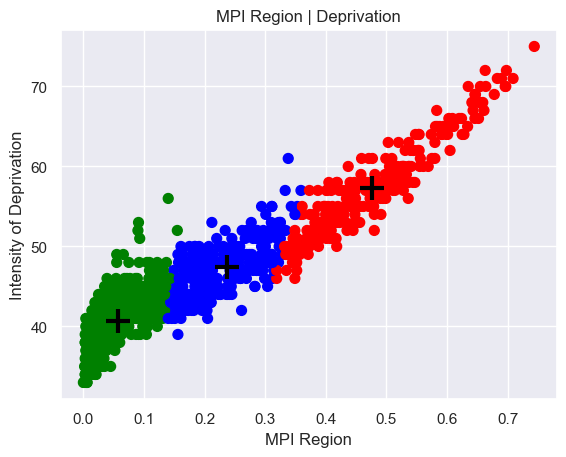

In [48]:
plt.scatter(mpic['mpi region'], mpic['intensity dep'], c=colors[mpic['cluster']], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers['mpi region'], centers['intensity dep'], linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('MPI Region')
plt.ylabel('Intensity of Deprivation')
plt.title('MPI Region | Deprivation')

The model has accurately created 3 different groupings based on headcout ratio and intensity od deprivation. However, I wonder if adding another cluster would make it even more accurate

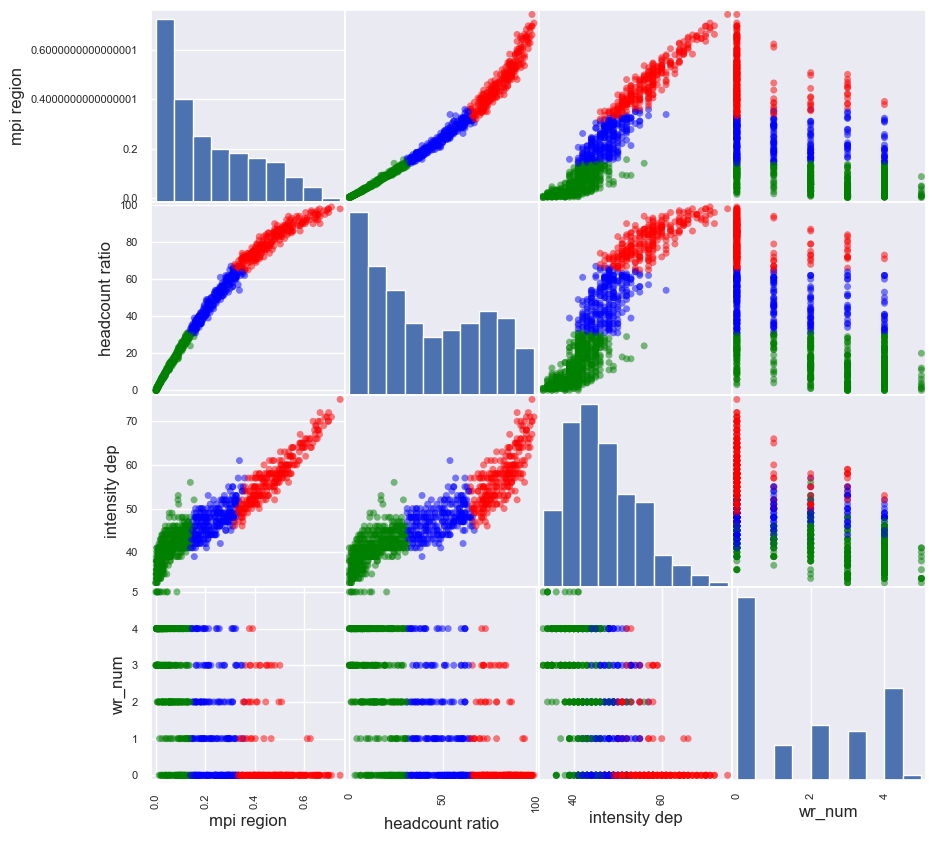

In [49]:
pd.plotting.scatter_matrix(X, c=colors[mpic['cluster']], figsize=(10,10), s=100);

Based on these various plots and sticking with only 3 clusters there seems to be strong relationship between each variable and its cluster

-------------------------------------------------------------------------------------------------------------------------------

#### K-Means with 4 clusters

In [50]:
#Defining X and dropping the first column
X = mpic.drop('world region', axis=1)

km = KMeans(n_clusters=4, random_state=1)
km.fit(X)

KMeans(n_clusters=4, random_state=1)

I'll use 4 clusters for this model with a random point.

In [51]:
#kmean lables for the data
km.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 3, 2, 0, 1, 0, 1, 1, 1, 1, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 2, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 0, 2,
       2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,

In [52]:
mpic['cluster'] = km.labels_
mpic.sort_values('cluster').tail()

C:\Users\rjm37\AppData\Local\Temp\ipykernel_11768\1488590874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpic['cluster'] = km.labels_


,world region,mpi region,headcount ratio,intensity dep,wr_num,cluster
740,Latin America and Caribbean,0.024,6,39,4,3
516,Arab States,0.049,12,40,3,3
738,Latin America and Caribbean,0.004,1,36,4,3
746,Latin America and Caribbean,0.008,2,36,4,3
377,East Asia and the Pacific,0.053,13,40,2,3


In [53]:
mpic.sort_values('cluster').head()

,world region,mpi region,headcount ratio,intensity dep,wr_num,cluster
491,Sub-Saharan Africa,0.349,74,46,0,0
497,Sub-Saharan Africa,0.377,72,52,0,0
167,Sub-Saharan Africa,0.540,86,62,0,0
498,Sub-Saharan Africa,0.536,94,56,0,0
169,Sub-Saharan Africa,0.458,77,59,0,0


My observation from these two tables is that the higher headcount ratio played a big factor in determing which cluster was assigend to each value.

In [54]:
#Reviewing cluster centers
km.cluster_centers_

array([[4.94686364e-01, 8.31954545e+01, 5.83045455e+01, 2.86363636e-01,
        6.66133815e-16],
       [1.34730612e-01, 2.94163265e+01, 4.44326531e+01, 1.58367347e+00,
        1.40000000e+00],
       [2.86336788e-01, 5.74766839e+01, 4.88549223e+01, 7.40932642e-01,
        1.67875648e+00],
       [3.33723077e-02, 7.70769231e+00, 3.93415385e+01, 3.11076923e+00,
        1.00000000e+00]])

In [55]:
#calculating cluster mean
mpic.groupby('cluster').mean()

,mpi region,headcount ratio,intensity dep,wr_num
cluster,,,,
0,0.494686,83.195455,58.304545,0.286364
1,0.134967,29.475610,44.426829,1.585366
2,0.286823,57.546875,48.885417,0.734375
3,0.033372,7.707692,39.341538,3.110769


Based on this observation it would be interesting to see know which variables carry more weight in determing the cluster its assigned to. It seems like the headcout ratio and the world region number are more weigted

In [56]:
centers = mpic.groupby('cluster').mean()

Text(0.5, 1.0, 'MPI Region | Deprivation')

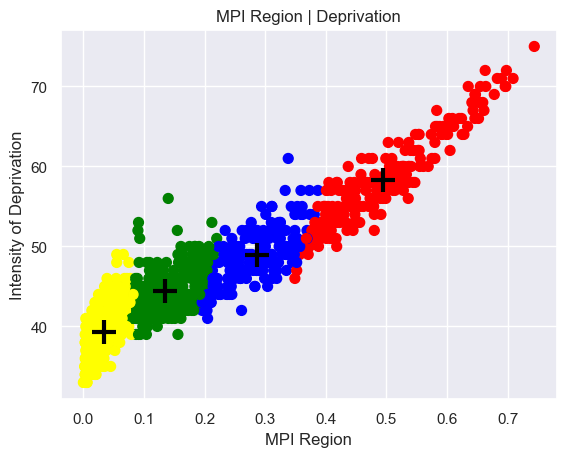

In [57]:
plt.scatter(mpic['mpi region'], mpic['intensity dep'], c=colors[mpic['cluster']], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers['mpi region'], centers['intensity dep'], linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('MPI Region')
plt.ylabel('Intensity of Deprivation')
plt.title('MPI Region | Deprivation')

There are several observations from this graphic:
1. The green cluster and yellow cluster seem to be bunched together, vs some sparodic seperation of the red and blue.
2. There doesn't seem to many yellow clusters past a MPI region of 0.1.
3. As expected, the higher the mpi region, the higher the intensity of drivation is for a region

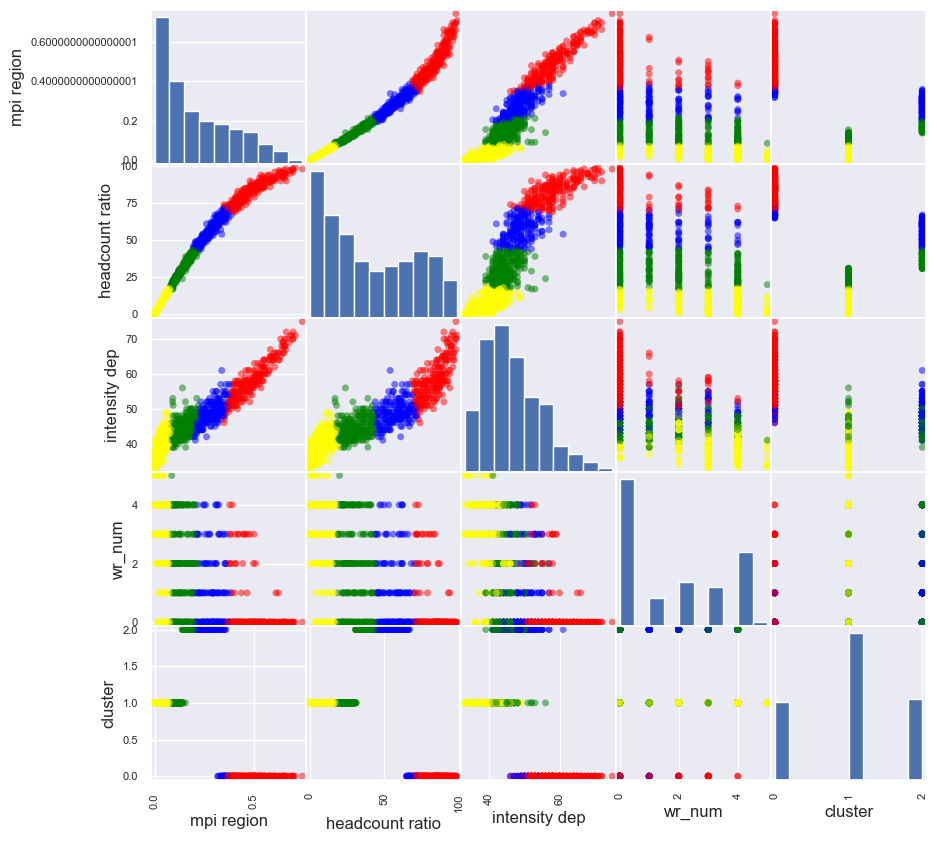

In [58]:
pd.plotting.scatter_matrix(X, c=colors[mpic['cluster']], figsize=(10,10), s=100);

A couple of obervations from these plots:
1. Just as there is a strong correlation with the intensity deprivation and headcout ratio, there is a strong correlation with the region mpi and intensity deprivation
2. When it comes to the world region, Sub-Sahara Africa has the most poverty deprivation

### Scaling the data

I'm going to scale the data to normalize the various variables. This will help ensure no one variable is getting more weight/value vs the others.

In [59]:
#Defining my scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
#Looking at my scaled data
df = pd.DataFrame(X_scaled)
df.head()

,0,1,2,3,4
0,0.956172,0.908989,1.275631,-0.378006,-1.399779
1,1.386696,1.309782,1.399748,-0.378006,-1.399779
2,0.482050,0.641793,0.406818,-0.378006,1.374380
3,0.487499,0.508195,0.903283,-0.378006,1.374380
4,0.618292,0.708592,0.779167,-0.378006,1.374380


In [61]:
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=1)

In [62]:
mpic.columns

Index(['world region', 'mpi region', 'headcount ratio', 'intensity dep',
       'wr_num', 'cluster'],
      dtype='object')

In [63]:
#Defining my sacled dataframe
scaled_mpic = pd.DataFrame(X_scaled)
#adding km lables to dataframe
scaled_mpic['cluster'] = km.labels_
#added scaled columns to dataframe
scaled_mpic.columns = mpic.columns

#looking at my data and sorted by values
scaled_mpic.sort_values('cluster').head()

,world region,mpi region,headcount ratio,intensity dep,wr_num,cluster
0,0.956172,0.908989,1.275631,-0.378006,-1.399779,0
573,1.261354,1.309782,1.151515,-0.975400,-1.399779,0
551,2.084255,1.677176,2.268561,-0.975400,-1.399779,0
550,1.561086,1.443380,1.523864,-0.975400,-1.399779,0
549,1.484790,1.443380,1.275631,-0.975400,-1.399779,0


In [64]:
#creating dataframe for cluster cetners
centers = pd.DataFrame(km.cluster_centers_)
#adding specific columns I need
centers.columns = ['world region','mpi region', 'headcount ratio', 'intensity dep', 'wr_num']
centers.head()

,world region,mpi region,headcount ratio,intensity dep,wr_num
0,1.445883,1.387892,1.321124,-0.796896,-1.399779
1,-0.707402,-0.713971,-0.528775,-0.361772,-0.012700
2,0.143571,0.302166,0.096284,-0.401433,1.374380
3,-0.919336,-1.003558,-0.883482,1.259223,0.010971


Text(0.5, 1.0, 'MPI Region | Intensity of Deprivation')

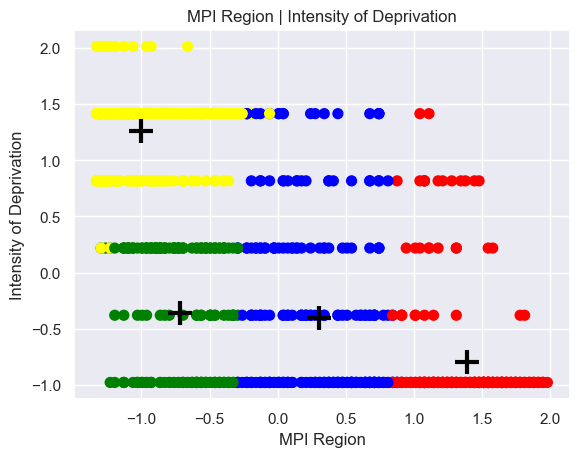

In [65]:
plt.scatter(scaled_mpic['mpi region'], scaled_mpic['intensity dep'], c=colors[scaled_mpic['cluster']], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers['mpi region'], centers['intensity dep'], linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('MPI Region')
plt.ylabel('Intensity of Deprivation')
plt.title('MPI Region | Intensity of Deprivation')

This is interesting becasue after scaling you can clearly see overlapping happening. However, the lower the intensity deprivation there is little to no overlapping.

In [66]:
#getting the mean of the scaled data
centers = scaled_mpic.groupby('cluster').mean()

Text(0.5, 1.0, 'MPI Region | Intensity of Deprivation')

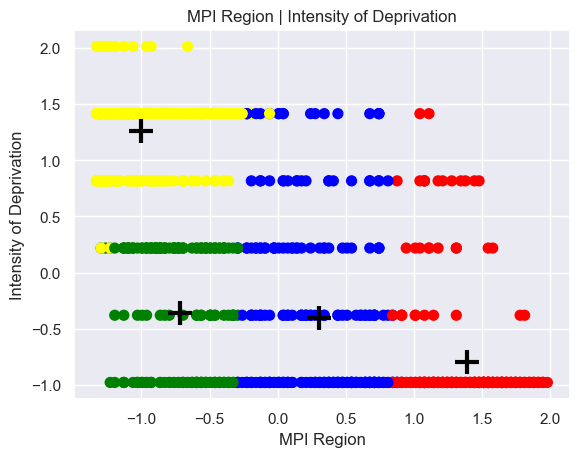

In [67]:
plt.scatter(scaled_mpic['mpi region'], scaled_mpic['intensity dep'], c=colors[scaled_mpic['cluster']], s=50);
plt.scatter(centers['mpi region'], centers['intensity dep'], linewidths=3, marker='+', s=300, c='black');

plt.xlabel('MPI Region')
plt.ylabel('Intensity of Deprivation')
plt.title('MPI Region | Intensity of Deprivation')

Even with the cluster centers mean there is still overlapping happening.

In [68]:
mpic.groupby('cluster').mean()

,mpi region,headcount ratio,intensity dep,wr_num
cluster,,,,
0,0.494686,83.195455,58.304545,0.286364
1,0.134967,29.475610,44.426829,1.585366
2,0.286823,57.546875,48.885417,0.734375
3,0.033372,7.707692,39.341538,3.110769


Text(0.5, 1.0, 'headcount ratio vs intensity dep: scaled centers, unscaled data')

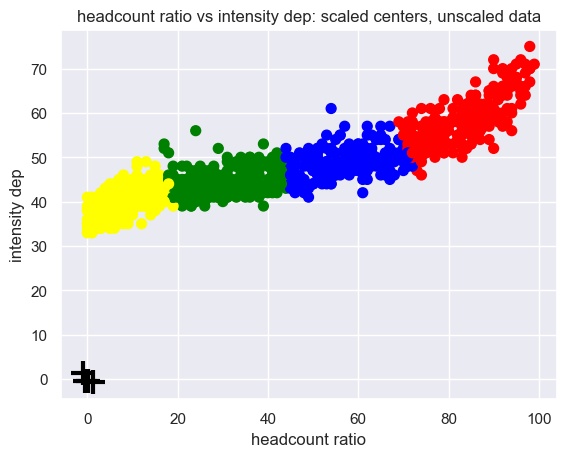

In [69]:
# plot scaled centers and unscaled data
plt.scatter(mpic['headcount ratio'], mpic['intensity dep'], c=colors[mpic['cluster']], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers['headcount ratio'], centers['intensity dep'], linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('headcount ratio')
plt.ylabel('intensity dep')
plt.title('headcount ratio vs intensity dep: scaled centers, unscaled data')

Scaling the data definitely removed the weight that was given to the values and we can see the difference in the model being able create similarities.

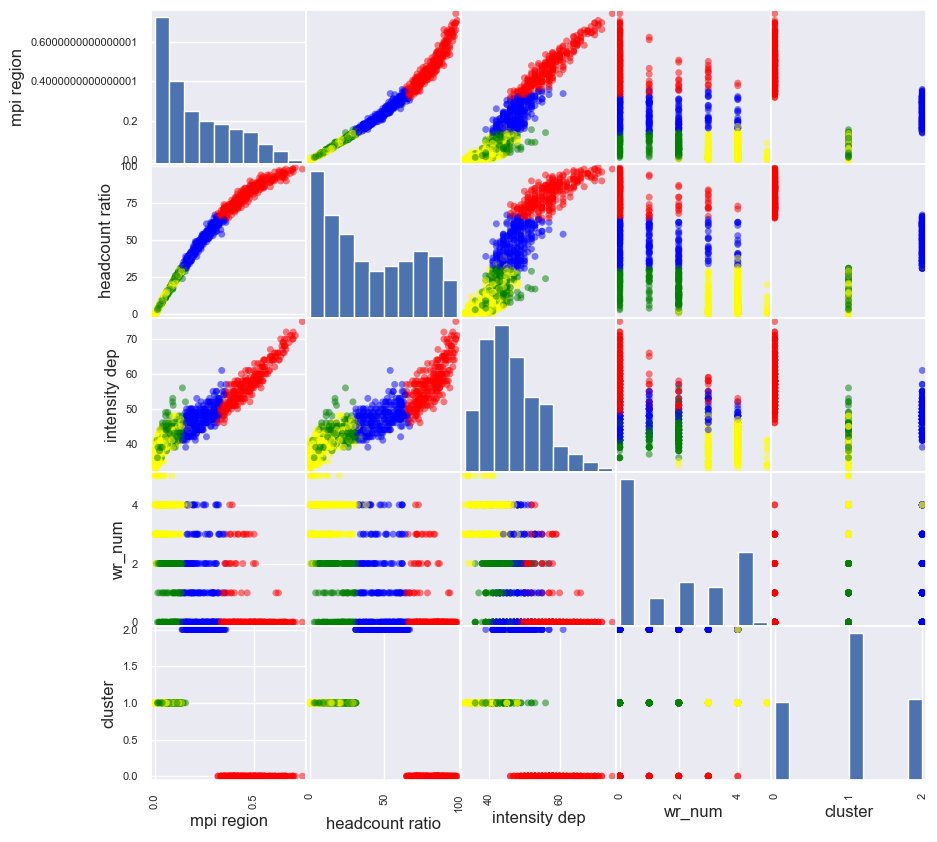

In [70]:
pd.plotting.scatter_matrix(X, c=colors[scaled_mpic['cluster']], figsize=(10,10), s=100);

## K-Means Clustering Model 3 Synopsis

Using K-Means clustering model to create groupings of similiar regions seems to be a good model to use if one needs to determine where a country lies on the spectrum of multidimensional poverty index. I used two different types of clusters for my model. The first option I chose was using 3 clusters and the model group the regions seemlessly. I also tried using 4 clusters to see what the outcome would be. At first glance it seemed like having 4 clusters gave an even more distinct line in grouping similar countries, but once it was time to scale the data, the overlapping was more visible. 

For simplicty and ensuring the model is accurate in its grouping one could choose to keep only 3 clusters, but if you go that route then you will have a wide range of similarites.

# Conclusion

At the beginning of this we sought to answer the following questions:
- Which regions in the world have the highest poverty rate according to MPI?
- Which regions in the world have the highest intensity of depravation according to MPI?
- Is there a correlation between a region and their MPI?

Throughout working with the data we were able to answer these questions and even expanded the questions in order to gather insight. Here are several conclusion as it pertains to this project:
1. The world region with the highest poverty reate according to MPI is Sub-Sahara Africa with a MPI mean of 0.33202, but this it's possible this is the casue due to Sub-Sahara Africa having the most data points in this dataset at 431 compared to the next highest at 217.
2. When examining which regions have the highest intensity of deprivation according to MPI I found that Sub-Sahara Africa has the highest with an deprivation mean of 51.4. This is followed by South Asia at 47.2 and East Asia and the Pacific at 45.1. This was intersting becasue these two regions had the fewer data points than Sub-Sahara Africa at 121 and 81 respectively.
3. I found that there is a strong correlation between a region and their MPI. In order to find these correlations and ensure they were accurate, I created a linear regression model. The linear regression model proved that a regions MPI is strong tied to the intensitiy of deprivation.
4. I also decided to add another variable (headcount ration) to the linear regression model to see if the accuracy would improve to predict this relationship and it did. 

After answering the above questions, I wanted to see if a cluster model would be better at predicting a region and its MPI. After doing a K-means clustering model with two different clustering numbers, I think that a linear regression model would be best at determing a regions mpi.